In [ ]:
import pandas as pd

# xlsx file
data = pd.read_excel('ev_battery_data.xlsx')

In [2]:
data.info()  # Check for null values
data.dropna(inplace=True)  # Drop rows with missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Trip                              70 non-null     object 
 1   Date                              70 non-null     object 
 2   Route/Area                        70 non-null     object 
 3   Weather                           70 non-null     object 
 4   Battery Temperature (Start) [°C]  70 non-null     float64
 5   Battery Temperature (End)         70 non-null     float64
 6   Battery State of Charge (Start)   70 non-null     float64
 7   Battery State of Charge (End)     70 non-null     float64
 8   Unnamed: 8                        70 non-null     float64
 9   Ambient Temperature (Start) [°C]  70 non-null     float64
 10  Target Cabin Temperature          70 non-null     float64
 11  Distance [km]                     70 non-null     float64
 12  Duration [

In [4]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns
data_for_scaling = data[['Battery Temperature (Start) [°C]',
                         'Battery State of Charge (Start)',
                         'Battery State of Charge (End)']]

# Initialize MinMaxScaler and scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_scaling)

# Display the scaled data
print(scaled_data)


[[0.70967742 0.96140351 0.96148148]
 [0.77419355 0.85614035 0.76888889]
 [0.80645161 0.9122807  0.88444444]
 [0.83870968 0.76491228 0.76      ]
 [0.90322581 0.61754386 0.6637037 ]
 [0.83870968 0.94035088 0.71111111]
 [1.         0.55964912 0.27851852]
 [0.87096774 0.96666667 0.89925926]
 [0.74193548 0.75789474 0.78814815]
 [0.74193548 0.66842105 0.67407407]
 [0.87096774 0.97368421 0.89185185]
 [0.93548387 0.77192982 0.72444444]
 [0.74193548 0.94736842 1.        ]
 [0.74193548 0.9        0.95555556]
 [0.58064516 0.75964912 0.71111111]
 [0.64516129 0.55263158 0.53481481]
 [0.5483871  0.97017544 0.92592593]
 [0.61290323 0.81403509 0.81185185]
 [0.74193548 1.         0.96296296]
 [0.58064516 0.79824561 0.79555556]
 [0.61290323 0.69824561 0.71555556]
 [0.64516129 0.97894737 0.90518519]
 [0.5483871  0.98070175 0.98518519]
 [0.58064516 0.88421053 0.87407407]
 [0.64516129 0.75263158 0.73777778]
 [0.64516129 0.95964912 0.93925926]
 [0.67741935 0.8245614  0.76148148]
 [0.61290323 0.88421053 0.83

In [8]:
!pip install tensorflow


INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 9.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 11.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 9.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

In [11]:
import pandas as pd
import numpy as np

# Re-create the DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['Scaled Temperature', 'Scaled SOC Start', 'Scaled SOC End'])


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define your dataset (scaled data)
X = np.array([scaled_df.values[i:i+10] for i in range(len(scaled_df)-10)])  # Use past 10 rows for prediction
y = np.array(scaled_df['Scaled SOC End'][10:])  # Target is the 11th row's SOC End

# Define input shape
n_timesteps = X.shape[1]  # Number of time steps (e.g., 10)
n_features = X.shape[2]   # Number of features (e.g., 3: temperature, SOC start, SOC end)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
    Dense(1)  # Output layer for regression (predicting a single value)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20
2/2 [==============================] - 1s 7ms/step - loss: nan
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: nan
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: nan
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: nan
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: nan
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: nan
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 11/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 12/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 13/20
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 14/20
2/2 [=================

In [14]:
pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
print("Matplotlib installed successfully!")


Matplotlib installed successfully!


In [20]:
import pandas as pd
import numpy as np

# Assuming scaled_df is already defined
scaled_df['Gassing'] = np.where(
    (scaled_df['Scaled Temperature'] > 0.8) & 
    (scaled_df['Scaled SOC Start'] > 0.8) & 
    (scaled_df['Scaled SOC End'] > 0.8), 
    1, 0
)


In [21]:
from sklearn.model_selection import train_test_split

# Features and target
X = scaled_df[['Scaled Temperature', 'Scaled SOC Start', 'Scaled SOC End']]
y = scaled_df['Gassing']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [23]:
print(X.isnull().sum())


Scaled Temperature    2
Scaled SOC Start      2
Scaled SOC End        2
dtype: int64


In [24]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' as alternatives
X = imputer.fit_transform(X)


In [ ]:
rf_model.fit(X_train, y_train)


In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Use HistGradientBoostingClassifier, which handles NaN values natively
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [30]:
# Fit the model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [31]:
# Fit the model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


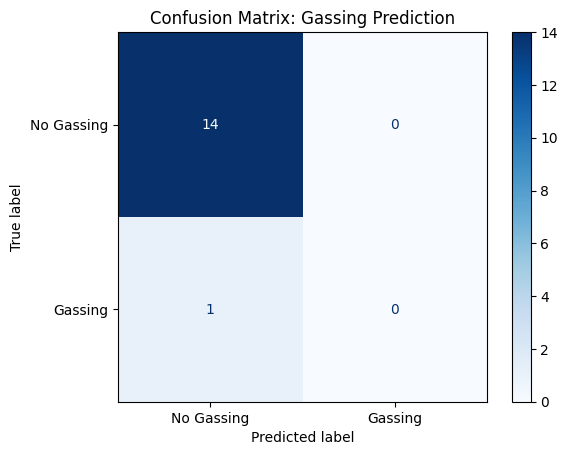

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Gassing', 'Gassing'])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Gassing Prediction")
plt.show()


In [33]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['No Gassing', 'Gassing'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

  No Gassing       0.93      1.00      0.97        14
     Gassing       0.00      0.00      0.00         1

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
